# Part I - (Prosper Loan Data Exploration)
## by Sango Pascal

## Introduction
> This is a Loan data set which contains 113,937 loan records with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load in the dataset into a pandas dataframe
prosperLoanData = pd.read_csv('prosperLoanData.csv')

In [3]:
#Get the shap and datatypes of the dataframe
print(prosperLoanData.shape)
print(prosperLoanData.dtypes)
prosperLoanData.head(10)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
#GEt general information about data in the dataset
prosperLoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
#get statistical description of the dataset
prosperLoanData.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
#List of all the columns involve in the dataset
prosperLoanData.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What is the structure of your dataset?

There are 113,937 loans in this dataset with 81 variables. Most of the variables are float. Prosperscore is dependents on most of the other variables. There exist some cartegorical variables such as ProsperScore(Ordinal), employmentStatus(Norminal), and IncomeVerifiable.

### What is/are the main feature(s) of interest in your dataset?
> My interest in this dataset is spotting out soe of the variables that will affect the prosperScore of a borrower.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I Expect that employmentStatus and IncomeVerifiable are some of the variables ProsperScore depends on, Also some of the attributes which can affect the ProsperScore are; isBorrowerHomeOwner,OnTimeProsperPayments  and Recomendations

In [7]:
#To start with, I would like to access my key variable of interest(ProsperScore. 
#I would start by checking the datatypes
prosperLoanData.ProsperScore.dtypes

dtype('float64')

In [8]:
#check for null values in ProsperScore
prosperLoanData['ProsperScore'].isnull().sum().sum()

29084

In [9]:
prosperLoanData['ProsperScore'].tail(10)

113927    NaN
113928    6.0
113929    3.0
113930    6.0
113931    6.0
113932    5.0
113933    8.0
113934    3.0
113935    5.0
113936    7.0
Name: ProsperScore, dtype: float64

In [10]:
#from the above we can see that there are 29084 missing values

#Removing all null values as we won't need them for this analysis (i did this because of the description in the data dictionary)
prosperLoanData = prosperLoanData.query('ProsperScore.notnull()')

#check if there exis any other null values
prosperLoanData['ProsperScore'].isnull().sum().sum()

0

In [11]:
prosperLoanData['ProsperScore'].info()

<class 'pandas.core.series.Series'>
Int64Index: 84853 entries, 1 to 113936
Series name: ProsperScore
Non-Null Count  Dtype  
--------------  -----  
84853 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [12]:
#I would like to change the datatype of ProsperScore to integer
prosperLoanData['ProsperScore'] = prosperLoanData.ProsperScore.astype(int)
prosperLoanData.ProsperScore.dtypes

dtype('int32')

In [13]:
#from the data description, the highest score is 10
#check if there is any score greater than 10
prosperLoanData['ProsperScore'].max()

11

In [14]:
#replace values greater than 11 with 10
prosperLoanData['ProsperScore'] = prosperLoanData['ProsperScore'].replace(11,10)
prosperLoanData['ProsperScore'].max()

10

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

I'll start by protting the graph of the main variable of interest()

In [15]:
#function to plot bar chart
def barChart(Dataframe,variable, x_label, title):
    #Add figure size
    plt.figure(figsize = [14, 6])
    base_color = sb.color_palette()[3]
    sb.countplot(data=Dataframe, x=variable, color  = base_color );
    plt.xlabel(x_label)
    plt.title(title, fontsize=14)
    plt.show()

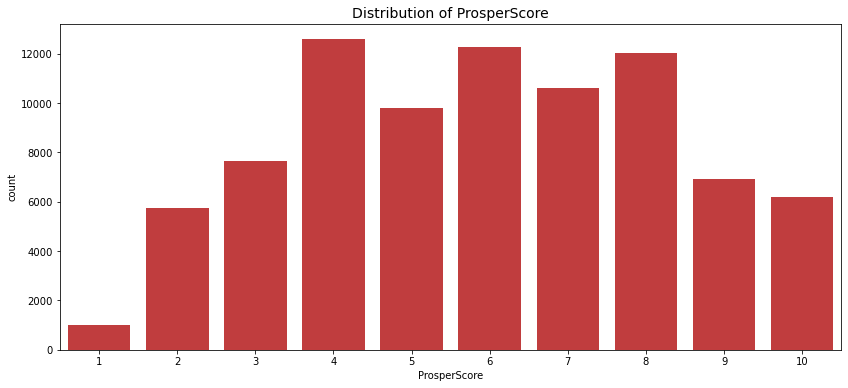

In [16]:
barChart(prosperLoanData,"ProsperScore","ProsperScore","Distribution of ProsperScore", )

> From the above plot we can see that the majority of those who receive loan have a prosperScore of 4,6 and 8

In [17]:
# Here i want to see type of categorical data in this variable
prosperLoanData['EmploymentStatus'].head(20)

1      Employed
3      Employed
4      Employed
5      Employed
6      Employed
7      Employed
8      Employed
9      Employed
10     Employed
12     Employed
13     Employed
14     Employed
15        Other
16    Full-time
18     Employed
19     Employed
20     Employed
22        Other
23     Employed
24     Employed
Name: EmploymentStatus, dtype: object

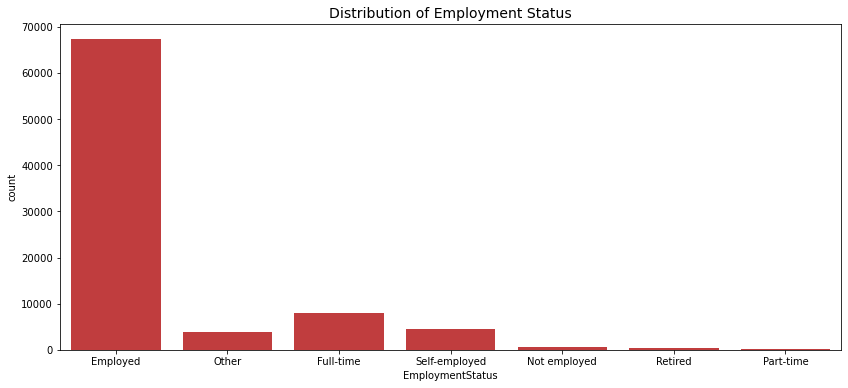

In [18]:
#Now lets see the distribution of this categorical data
#this graph will help us know the employment status of majority of borrowers
barChart(prosperLoanData,"EmploymentStatus","EmploymentStatus","Distribution of Employment Status")

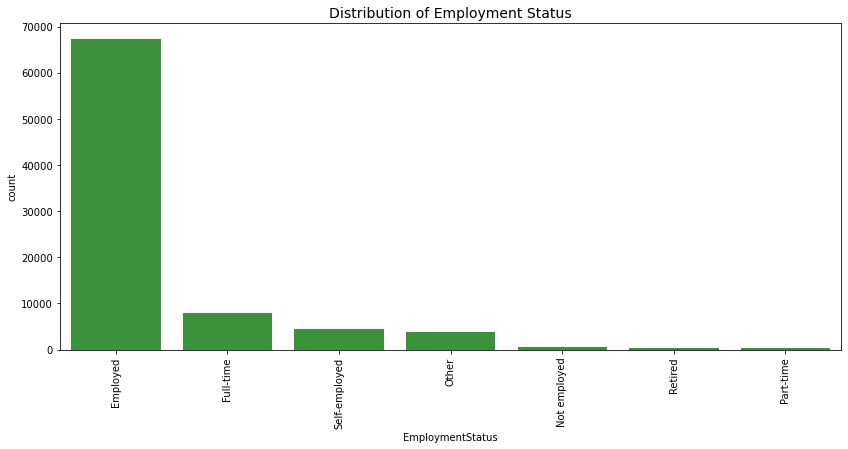

In [19]:
#The x labels are not good so i have to add rotation
#Now lets see the distribution of this categorical data
freq = prosperLoanData['EmploymentStatus'].value_counts()
order = freq.index

#Add figure size
plt.figure(figsize = [14, 6])
sb.countplot(data=prosperLoanData, x='EmploymentStatus', color=sb.color_palette()[2], order=order);
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);
plt.title("Distribution of Employment Status", fontsize=14);


> From the above plot we can see that most of the people who receive loan are those who are employed

In [20]:
# Here i want to see type of data of IncomeVerifiable variable
prosperLoanData['IncomeVerifiable'].head(10)

1     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
12    True
Name: IncomeVerifiable, dtype: bool

<Figure size 1008x432 with 0 Axes>

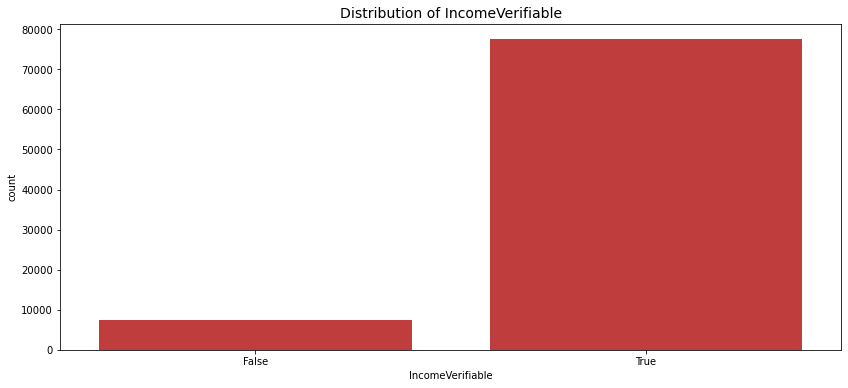

In [21]:
#plot for income verifiable

#Add figure size
plt.figure(figsize = [14, 6])
barChart(prosperLoanData,"IncomeVerifiable","IncomeVerifiable","Distribution of IncomeVerifiable")

> From the above plot, we can see that most of the borrowes have a verifiable income

In [22]:
# Here i want to see type of data of IsBorrowerHomeowner variable
prosperLoanData['IsBorrowerHomeowner'].head(10)

1     False
3      True
4      True
5      True
6     False
7     False
8      True
9      True
10    False
12    False
Name: IsBorrowerHomeowner, dtype: bool

<Figure size 1008x432 with 0 Axes>

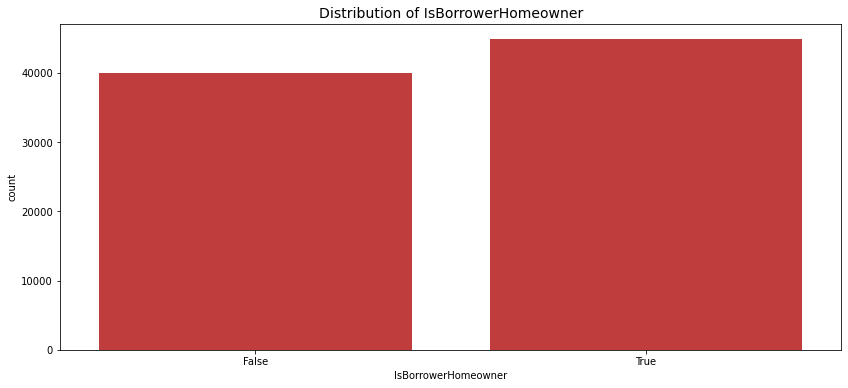

In [23]:
#plot for IsBorrowerHomeowner

#Add figure size
plt.figure(figsize = [14, 6])
barChart(prosperLoanData,"IsBorrowerHomeowner","IsBorrowerHomeowner","Distribution of IsBorrowerHomeowner")

> From the above graph we can see that majority of those who own a house will receive loan as compared to those who don't own a house

In [24]:
#Examine the variable OnTimeProsperPayments
prosperLoanData.OnTimeProsperPayments.info();
print(prosperLoanData.OnTimeProsperPayments.isna().sum())

<class 'pandas.core.series.Series'>
Int64Index: 84853 entries, 1 to 113936
Series name: OnTimeProsperPayments
Non-Null Count  Dtype  
--------------  -----  
19797 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB
65056


In [25]:
##Delete all null valuees from this dolumn
prosperLoanData = prosperLoanData.dropna(subset=['OnTimeProsperPayments'])
print(prosperLoanData['OnTimeProsperPayments'].isna().sum());

#Convert the datatype to interger
prosperLoanData['OnTimeProsperPayments'] = prosperLoanData.OnTimeProsperPayments.astype(int)
prosperLoanData.OnTimeProsperPayments.dtypes

0


dtype('int32')

In [26]:
prosperLoanData.OnTimeProsperPayments.info()

<class 'pandas.core.series.Series'>
Int64Index: 19797 entries, 4 to 113935
Series name: OnTimeProsperPayments
Non-Null Count  Dtype
--------------  -----
19797 non-null  int32
dtypes: int32(1)
memory usage: 232.0 KB


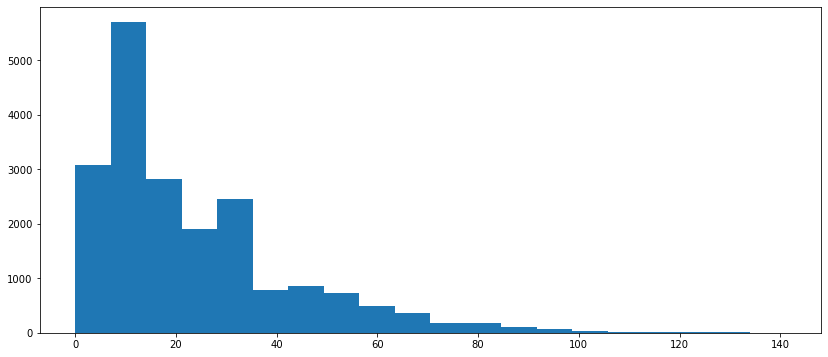

In [27]:
# Plot a histogram to see if OnTimeProsperPayments will influence the bank from giving loan to borrowers
#Add figure size
plt.figure(figsize = [14, 6])
plt.hist(data = prosperLoanData, x = 'OnTimeProsperPayments',bins=20);

> From the above graph, we can see that borrowers who always pay their loans on time are always given another loan

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> To start with, the graph for ProsperScore shows that majority of those who receive loan have a prosperScore of 5 and just an insignificant number of people with prosper score of 1 receive loan. Again, we can observe that EmploymentStatus is one of the factors that will detemine if an individual receives a loan or not, also making sure that Income is Verifiable. IsBorrowerHomeowner has an insignificant effect on whetherthe amount of people who receives loan.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, i had to fill the null values of ProsperScore and replace the values greater than ten(>10) with 10.

## Bivariate Exploration


In [28]:
def bivariateBar(variable, hueVar):
    plt.figure(figsize = [14, 6])
    sb.countplot(data=prosperLoanData, x=variable, hue=hueVar);
    plt.show()
def bivariateBar_II(variable, hueVar):
    plt.figure(figsize = [14, 6])
    sb.countplot(data=prosperLoanData, x=variable, hue=hueVar);
    variable= variable.replace("_"," ") # replace _ with space
    plt.show()

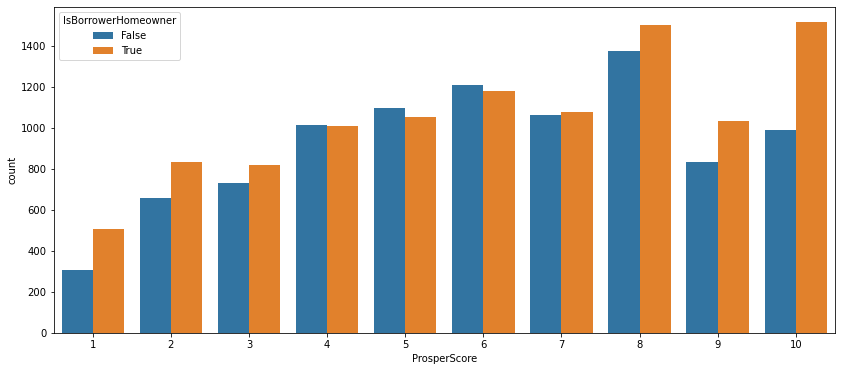

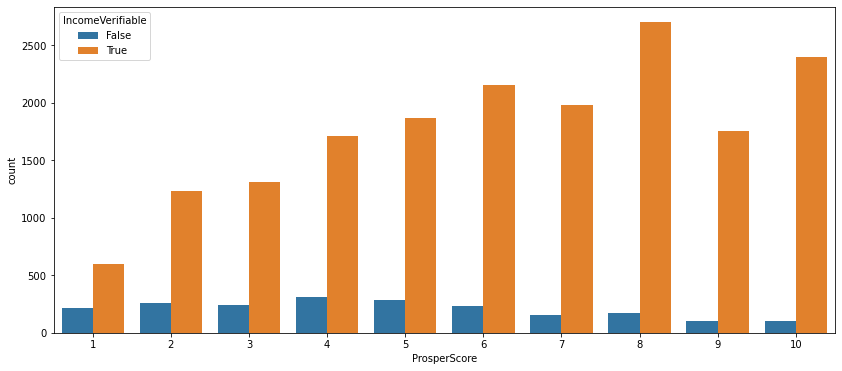

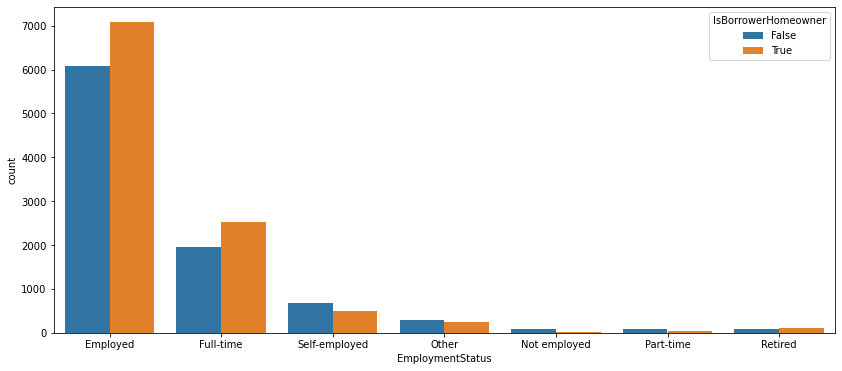

In [29]:
#Does borrowers who own a home have a high prosperScore?
bivariateBar('ProsperScore','IsBorrowerHomeowner');
#Does borrowers with verifiable income have a high prosperScore
bivariateBar('ProsperScore','IncomeVerifiable');
#Here we want to verify id most of those who are employed own a home
bivariateBar_II('EmploymentStatus','IsBorrowerHomeowner');

> From the above plots,we could see the relationships between IsBorrowerHomeowner and ProsperScore, here we can see that the majority of those who own a home have a high peosperScore. Looking at the second plot we can see the relationship between prosper score and income verifiable, majority of those with verifiable income have a highe prosperScore, Again looking at the last graph in this pair we can observe that majority of those who are employed own a home though a large amoint of those who does mot own a home but are employed still receive loan.

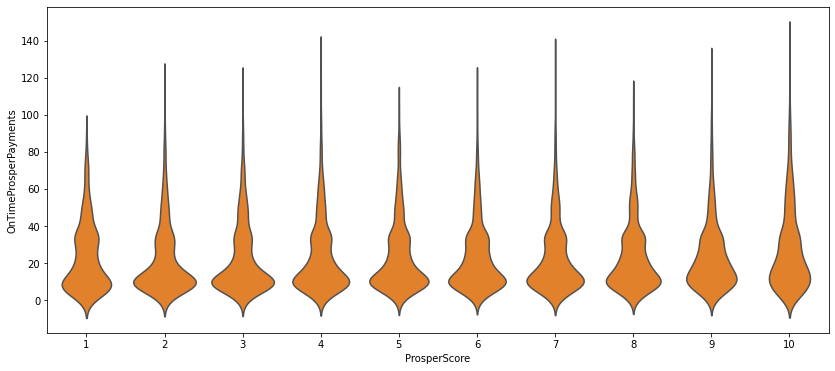

In [30]:
#PLot for the relationship between numeric and categorical values
plt.figure(figsize = [14, 6])
base_color = sb.color_palette()[1]
sb.violinplot(data=prosperLoanData, y='OnTimeProsperPayments', x='ProsperScore', color=base_color, inner=None);

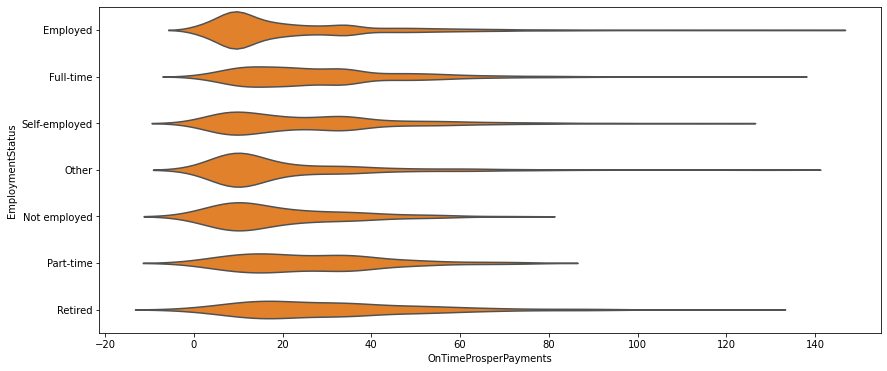

In [31]:
#Lets analise if the employment status of borrowers will affect ontime payment
plt.figure(figsize = [14, 6])
sb.violinplot(data=prosperLoanData, y='EmploymentStatus', x='OnTimeProsperPayments', color=base_color, inner=None);

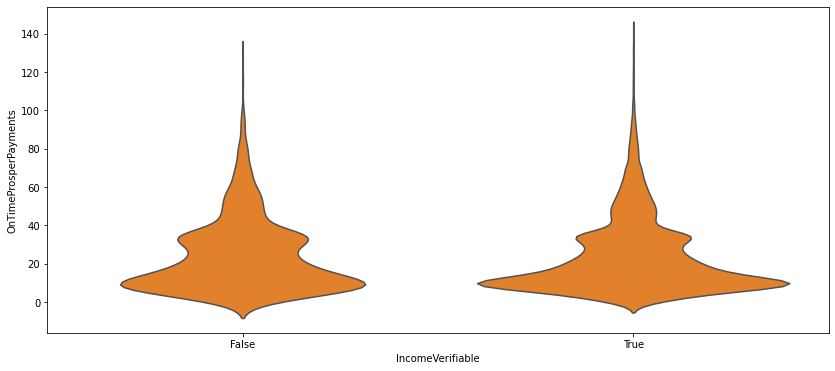

In [32]:
#Also, i would like to analise if inCome verifiable has an effect on Ontime Payment
plt.figure(figsize = [14, 6])
sb.violinplot(data=prosperLoanData, x='IncomeVerifiable', y='OnTimeProsperPayments', color=base_color, inner=None);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The different variable of interest have a great impact on the dependent variable(ProsperScore). To start with, we can see that majority of borrowers who are home owner have a ProsperScore of 5 which is the average ProsperScore and the prosperScore with the highest value count, we can see the same relationship with IncomeVerifiable, i won't only based my observation on the average prosperScroe(5), we can also observe a greater percentage of borrowers who own a house and have verifiable income have a prosperScore of 8 and 10. To continue, we can observe tht those with greater OnTimeProsperPayments have a greater prosperScore and are more likely to receive loan another time.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There exist some relationships between the other variables. To begin, we can se the relationship between OnTimePayment and IncomeVerifiable, the violin plot almost look the same but it is obvious that those with verifiable income will pay their loan on time(we can se this from the violin plot where one has a wider area). Furthermore, the employment status has a significant effect on ontimePayment, we can observe that the violin plot of those who are employed have a wideer area than the others signifying that they will pay their loan on time.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [33]:
#Function to plot Multivariate Variables.
def multVariate(x,y,hue):
    plt.figure(figsize = [14, 6])
    ax = sb.pointplot(data = prosperLoanData, x = x, y = y, hue = hue,
                      dodge = True, linestyles = "")
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
    
#Function to plot Multivariate Variables.
def multVariate_II(x,y,hue):
    plt.figure(figsize = [14, 6])
    ax = sb.stripplot(data = prosperLoanData, x = x, y = y, hue = hue,
                      dodge = True, order=None, size = 2, jitter = 0.35 )
    x = x.replace("_"," ") # replace _ with space
    y = x.replace("_"," ")
    hue = x.replace("_"," ")
    #title
    plt.title(f''''Average {y} by {x} and {hue} '''.title(), fontsize =14, weight="bold")
    #Xlabel
    plt.xlabel(x.title(), fontsize = 10, weight = 'bold')
    plt.ylabel('frequency'.title(), fontsize = 10, weight = 'bold')
    
    #despine
    sb.despine()

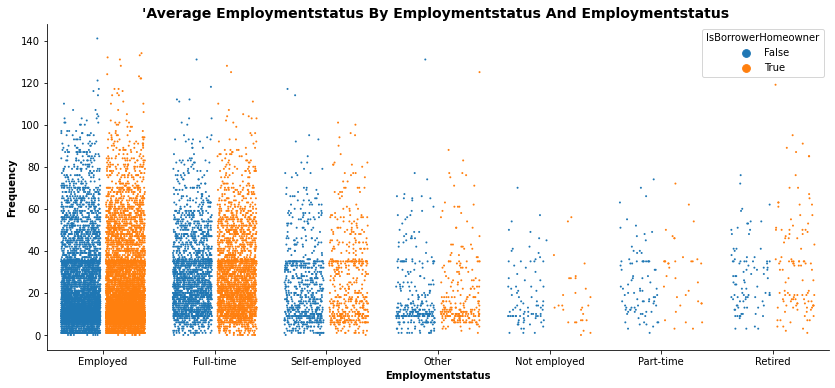

In [34]:
#PLot to see the relationship between EmploymentStatus, ProsperScore and IsBorrowerHomeowner
multVariate_II('EmploymentStatus','OnTimeProsperPayments','IsBorrowerHomeowner' );

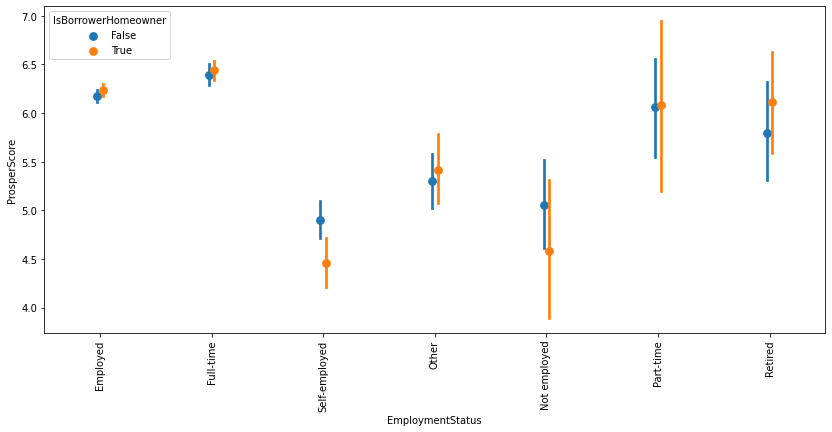

In [35]:
#PLot to see the relationship between EmploymentStatus, ProsperScore and IsBorrowerHomeowner
multVariate('EmploymentStatus','ProsperScore','IsBorrowerHomeowner' );

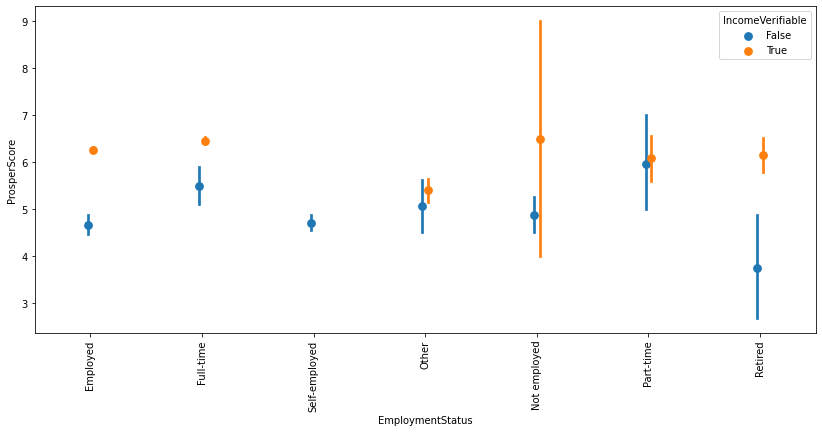

In [36]:
multVariate('EmploymentStatus','ProsperScore','IncomeVerifiable' );

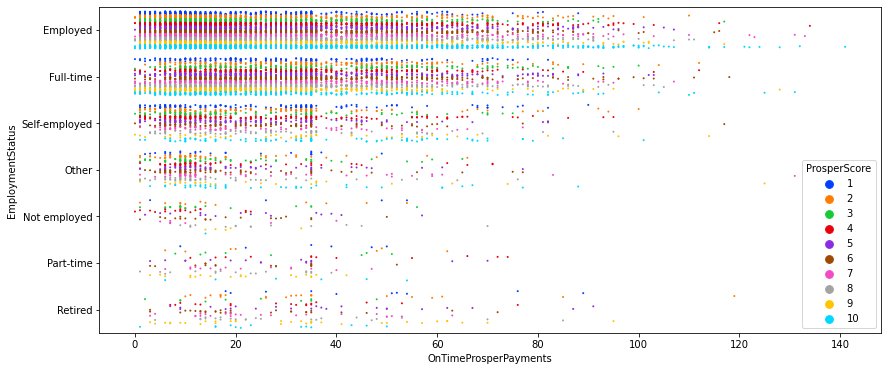

In [37]:
#PLot to see the relationship between EmploymentStatus, OnTimeProsperPayments and IsBorrowerHomeowner
plt.figure(figsize=[14,6])
sb.stripplot(
    x='OnTimeProsperPayments',
    y='EmploymentStatus', 
    data=prosperLoanData,
    palette='bright',
    size=2,
    jitter=0.35,
    hue='ProsperScore',
    dodge =True,
    orient = 'h');

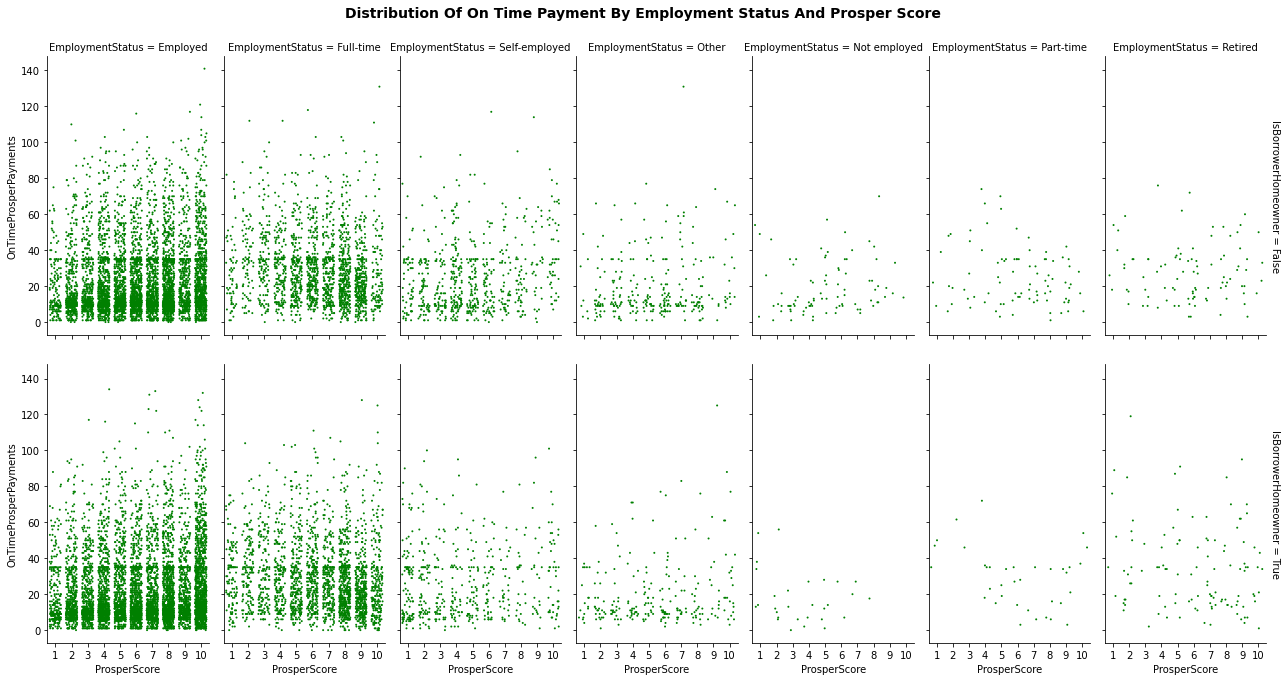

In [38]:
g = sb.FacetGrid(data = prosperLoanData, col = 'EmploymentStatus', row = 'IsBorrowerHomeowner', height = 2.5,
                margin_titles = True)
g.map(sb.stripplot, 'ProsperScore', 'OnTimeProsperPayments', size =2, jitter = 0.35,color= 'green', order = None)
##Set PLot Dimensions and fig level
g.fig.set_size_inches(18,10);

#Add main tittle
plt.suptitle("Distribution of on time payment by employment status and prosper score".title(), 
             y = 1, fontsize = 14, weight = "bold");

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the visualizations, it can be observed that, those who are retired and own a home have a higher prosperScore, again the prosperScore of those who are employed and own a home is greater than the prosperScore of those who are employed and don't own a home, this is a significance that borrowers who own a home have higher chances of receiving loan, getting a higher prosperScore and they can pay their Loan ontime. We can also observe that those who are unemployed and retired but have a verifiable income source have a higher prosperScore.

### Were there any interesting or surprising interactions between features?

> Yes, i realised that people who are retired and own a home are more likely to pay their loan on time loan on time

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.
>To begin, my main interest was checking the variables that are affecting prosperscore, i choosed 4 variables which according to me are good for my findings these variables are, IsBorrowerHomeowner, EmploymentStatus,IncomeVerifiable. From the different plots, we can observe that those who are employed have a higher prosperScore,those who are umemployed or rather retired but have a verifiable income  source will aswell have a higher ProsperScore which i beleive is a detemining factor of if an individual willl receive loan or not. Also, we can observe that if an unemployed person is a home owner, the prosperScore will increase
